In [1]:
import numpy as np
import scipy as sp
from importlib import reload
import neuraltda.topology2 as tp2
import glob
import os
import pickle
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['LiberationSans']
import matplotlib.pyplot as plt
import h5py as h5
%matplotlib inline

import seaborn as sns
import pandas as pd
from neuraltda import TPLCP
from neuraltda import FRLCP
reload(TPLCP)

import datetime
daystr = datetime.datetime.now().strftime('%Y%m%d')
figsavepth = '/home/brad/DailyLog/'+daystr+'/'
print(figsavepth)



/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


/home/brad/DailyLog/20180228/


In [2]:
import matplotlib

In [3]:
block_path = '/home/brad/krista/B1075/P01S03/'
block_path = '/home/brad/krista/B1083/P03S03/'
bdf = glob.glob('/home/brad/krista/B1083/P03S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-fulltrial/20170626T223014Z-10.0-5.0.binned')[0]

birds = ['B1083','B1056', 'B1235','B1075']
#birds = ['B1075']

bps = {'B1083': '/home/brad/krista/B1083/P03S03/', 'B1075': '/home/brad/krista/B1075/P01S03/',
       'B1235': '/home/brad/krista/B1235/P02S01/', 'B1056': '/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/'}

# Stim classes
B1083_classes = {'M_40k': 'R', 'N_40k':'L', 'O_40k':'R', 'P_40k':'L'}
B1075_classes = {'E_40k': 'R', 'F_40k':'L', 'G_40k':'R', 'H_40k':'L'}
B1087_classes = {'M_40k': 'R', 'N_40k':'L', 'O_40k':'R', 'P_40k':'L'}
B1235_classes = {'E_scaled_burung': 'R', 'F_scaled_burung':'L', 'G_scaled_burung':'R', 'H_scaled_burung':'L'}
B1056_classes = {'A_scaled_burung': 'R', 'B_scaled_burung':'L', 'C_scaled_burung':'R', 'D_scaled_burung':'L'}

stims = ['M_40k', 'N_40k', 'O_40k', 'P_40k']
B1083_stims = ['M_40k', 'N_40k', 'O_40k', 'P_40k']
B1075_stims = ['E_40k', 'F_40k', 'G_40k', 'H_40k']
B1235_stims = ['E_scaled_burung', 'F_scaled_burung', 'G_scaled_burung', 'H_scaled_burung']
B1056_stims = ['A_scaled_burung', 'B_scaled_burung', 'C_scaled_burung', 'D_scaled_burung']

stim_classes = {'B1083': B1083_classes, 'B1075': B1075_classes,
                'B1235': B1235_classes, 'B1056': B1056_classes}
bird_stims = {'B1083': B1083_stims, 'B1075': B1075_stims,
              'B1235': B1235_stims, 'B1056': B1056_stims}

In [4]:
# parameters
reload(tp2)
analysis_id = 'test2'
thresh = 4.0
nperms = 20

ncellsperm = 30
dims = [0,1,2,3,4]
Ntimes = 10
twin = np.linspace(0, 6000, Ntimes)
p_test = 0.2
N_tests = 60
winsize = 10.0
dtovr = winsize*0.5
comment = 'ForLogisticPred'
segment_info = [0,0]


In [5]:
datapth = '/home/brad/DailyLog/20180123'

with open(os.path.join(datapth, 'acframe_behavioralclass.pkl'), 'rb') as f:
    acframe_behavioralclass = pickle.load(f)
    
with open(os.path.join(datapth, 'acframe_stimulusID_8stims.pkl'), 'rb') as f:
    acframe_stimulusID = pickle.load(f)
    
with open(os.path.join(datapth, 'acframe_arbunf.pkl'), 'rb') as f:
    acframe_arbunf = pickle.load(f)
    
with open(os.path.join(datapth, 'acframe_FR.pkl'), 'rb') as f:
    acframe_FR = pickle.load(f)

/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/seaborn/categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


/home/brad/DailyLog/20180228/10.0-5.0-4.0-20-30-10-0.2-60-ShuffleClassLabels-stripplot.eps


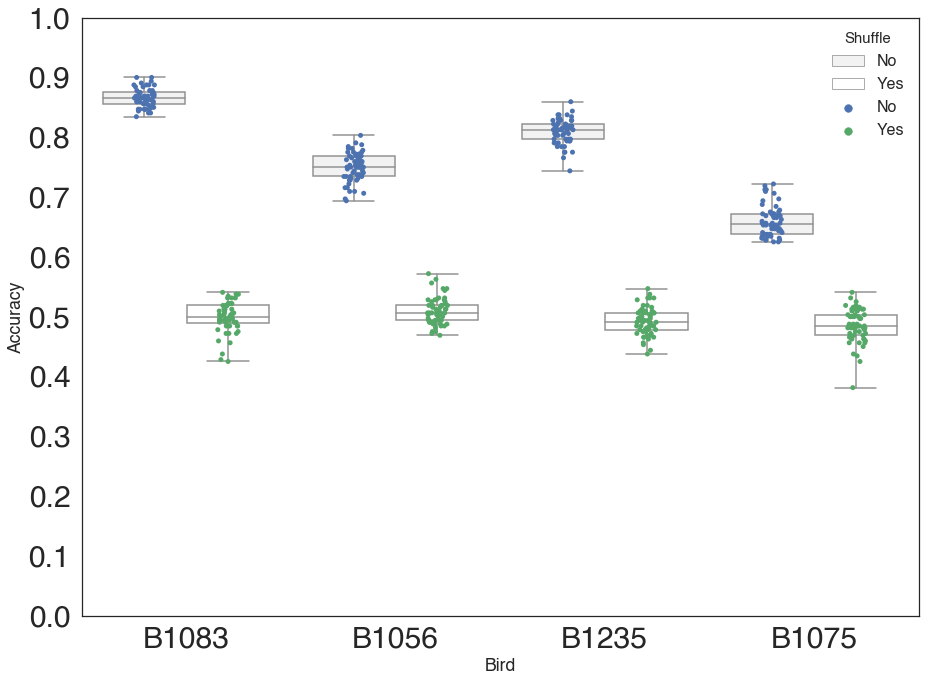

In [6]:
# Behavioral class decoder accuracy:  Real vs shuffled. stripplot
name = 'ShuffleClassLabels-stripplot'
sns.set_context('poster')


sns.set_style('white')
sns.set(context='poster', style='white', font='Helvetica')
plt.figure(figsize = (15,11))
sns.stripplot(x='Bird', y='Accuracy', hue='Shuffle', data=acframe_behavioralclass,
              jitter=True, split=True)
sns.boxplot(x='Bird', y='Accuracy', hue='Shuffle', data=acframe_behavioralclass, color='white',
            linewidth=1.5, whis=100)
plt.plot()

plt.yticks([x/10 for x in range(11)])
ax = plt.gca()
ax.tick_params(labelsize=30)
#plt.ylim([0.3, 1])
figpath = os.path.join(figsavepth, '{}-{}-{}-{}-{}-{}-{}-{}-{}.eps'.format(winsize, dtovr, thresh, nperms, ncellsperm, Ntimes, p_test, N_tests, name))
print(figpath)
plt.savefig(figpath)

/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/seaborn/categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


/home/brad/DailyLog/20180228/10.0-5.0-4.0-20-30-10-0.2-60-PredictStimID8Stims-stripplot.eps


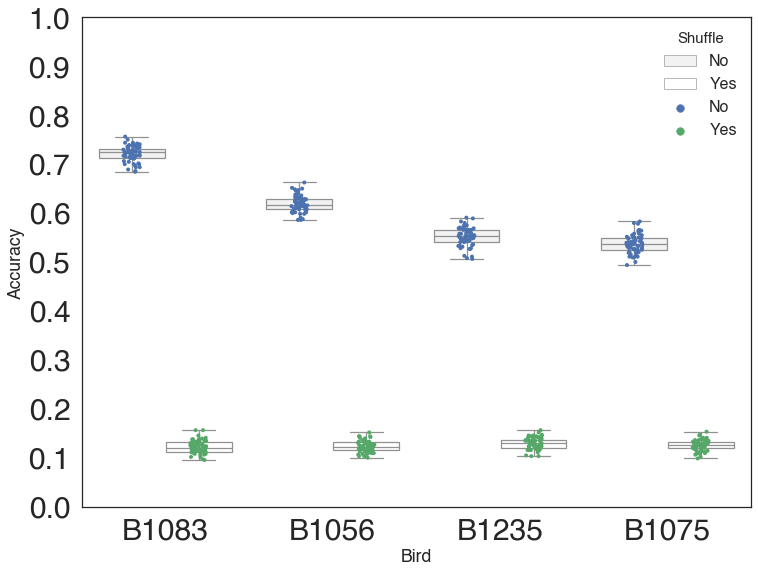

In [7]:
#stripplot
name = 'PredictStimID8Stims-stripplot'
sns.set_context('poster')
sns.set_style('white')
sns.set(context='poster', style='white', font='Helvetica')
plt.figure(figsize=(12, 9))
sns.stripplot(x='Bird', y='Accuracy', hue='Shuffle', data=acframe_stimulusID,
              jitter=True, split=True, size=4)
sns.boxplot(x='Bird', y='Accuracy', hue='Shuffle', data=acframe_stimulusID, color='white',
            linewidth=1.25, whis=100)
plt.plot()

ax = plt.gca()
ax.tick_params(labelsize=30)

plt.yticks([x/10 for x in range(11)])
#plt.ylim([0.3, 1])

figpath = os.path.join(figsavepth, '{}-{}-{}-{}-{}-{}-{}-{}-{}.eps'.format(winsize, dtovr, thresh, nperms, ncellsperm, Ntimes, p_test, N_tests, name))
print(figpath)
plt.savefig(figpath)

In [8]:
#stripplot

# plot familiar vs. unfamiliar
acframe_arbunf['Familiar'] = len(acframe_arbunf)*[False]
acframe_behavioralclass['Familiar'] = len(acframe_behavioralclass)*[True]

acframe_fam_unf = acframe_arbunf.append(acframe_behavioralclass)

/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/seaborn/categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


/home/brad/DailyLog/20180228/10.0-5.0-4.0-20-30-10-0.2-60-UnfvFam-stripplot.eps


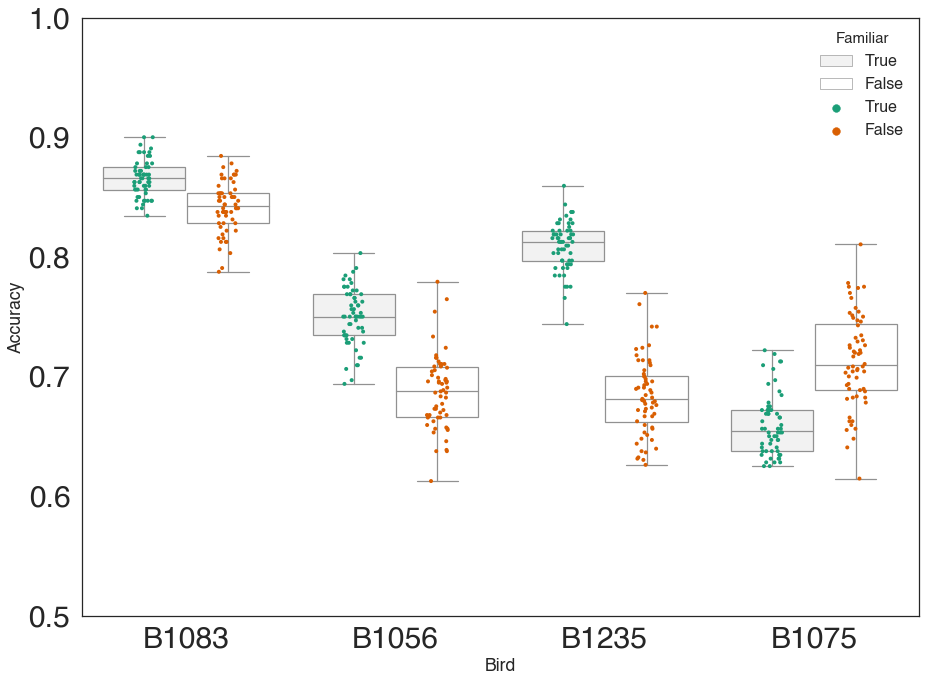

In [10]:
name = 'UnfvFam-stripplot'
sns.set_context('poster')
sns.set_style('white')
sns.set(context='poster', style='white', font='Helvetica')
plt.figure()
plt.figure(figsize=(15, 11))
sns.stripplot(x='Bird', y='Accuracy', hue='Familiar', data=acframe_fam_unf[acframe_fam_unf['Shuffle']=='No'],
              jitter=True, split=True, size=4, palette="Dark2", hue_order=[True, False])
sns.boxplot(x='Bird', y='Accuracy', hue='Familiar', data=acframe_fam_unf[acframe_fam_unf['Shuffle']=='No'], color='white',
            linewidth=1.25, whis=100, hue_order=[True, False])
plt.ylim([0.5, 1.0])
plt.plot()
ax = plt.gca()
ax.tick_params(labelsize=30)

#plt.yticks([x/10 for x in range(11)])
#plt.ylim([0.3, 1])
#plt.savefig('/home/brad/DailyLog/20170831/{}-{}-{}-{}-{}-{}-{}-{}-{}.eps'.format(winsize, dtovr, thresh, nperms, ncellsperm, Ntimes, p_test, N_tests, name))

figpath = os.path.join(figsavepth, '{}-{}-{}-{}-{}-{}-{}-{}-{}.eps'.format(winsize, dtovr, thresh, nperms, ncellsperm, Ntimes, p_test, N_tests, name))
print(figpath)
plt.savefig(figpath)

In [11]:
acframe_FRTop = acframe_fam_unf[(acframe_fam_unf['Familiar']==True) & (acframe_fam_unf['Shuffle'] == 'No')]
acframe_FRTop['Type'] = pd.Series(len(acframe_FRTop)*['Top'], index=acframe_FRTop.index)
acframe_FRTop = acframe_FRTop.append(acframe_FR[acframe_FR['Shuffle'] == 'No'])

/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/seaborn/categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


/home/brad/DailyLog/20180228/10.0-5.0-4.0-20-30-10-0.2-60-FRvsTop-stripplot.eps


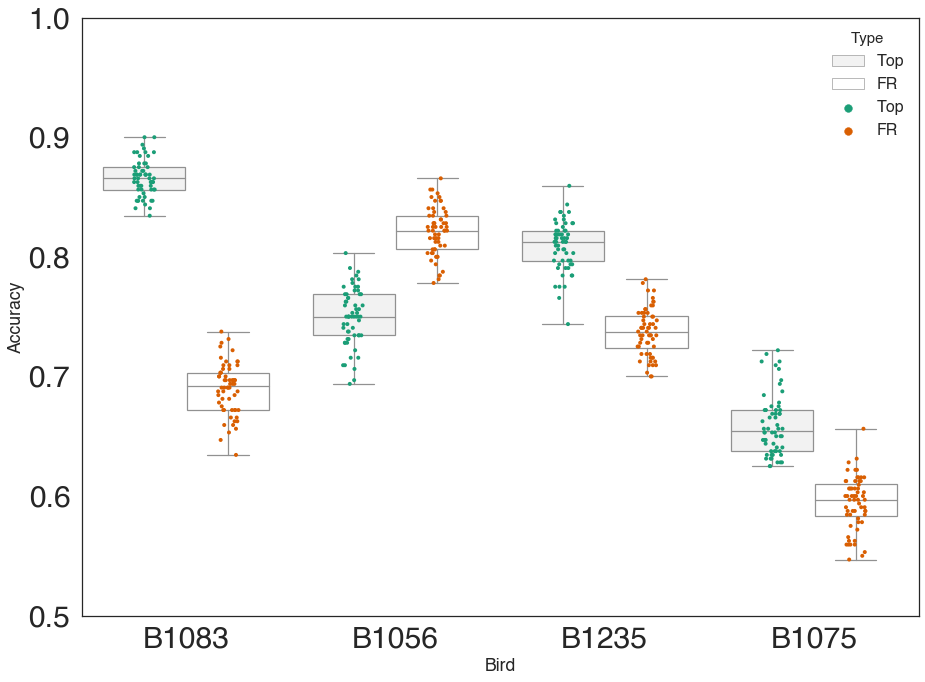

In [12]:
#stripplot
name = 'FRvsTop-stripplot'
sns.set_context('poster')
sns.set_style('white')
sns.set(context='poster', style='white', font='Helvetica')
plt.figure(figsize=(15, 11))
sns.stripplot(x='Bird', y='Accuracy', hue='Type', data=acframe_FRTop,
              jitter=True, split=True, size=4, palette="Dark2")
sns.boxplot(x='Bird', y='Accuracy', hue='Type', data=acframe_FRTop, color='white',
            linewidth=1.25, whis=100)
plt.ylim([0.5, 1.0])
plt.plot()
ax = plt.gca()
ax.tick_params(labelsize=30)

#plt.yticks([x/10 for x in range(11)])
#plt.ylim([0.3, 1])
#plt.savefig('/home/brad/DailyLog/20170831/{}-{}-{}-{}-{}-{}-{}-{}-{}.eps'.format(winsize, dtovr, thresh, nperms, ncellsperm, Ntimes, p_test, N_tests, name))

figpath = os.path.join(figsavepth, '{}-{}-{}-{}-{}-{}-{}-{}-{}.eps'.format(winsize, dtovr, thresh, nperms, ncellsperm, Ntimes, p_test, N_tests, name))
print(figpath)
plt.savefig(figpath)



In [13]:
# Plot all of Familiar/unfamiliar/fr/shuffle
acframe_FR['Familiar'] = len(acframe_FR)*['FR']
acframe_fam_unf_FR = acframe_fam_unf.append(acframe_FR)
acframe_fam_unf_FR_shuff = acframe_fam_unf_FR[(acframe_fam_unf_FR['Shuffle'] == 'Yes') &
                                              (acframe_fam_unf_FR['Familiar'] == True)]
acframe_fam_unf_FR_shuff['Familiar'] = len(acframe_fam_unf_FR_shuff)*['Shuffle']
acframe_fam_unf_FR_shuff['Shuffle'] = len(acframe_fam_unf_FR_shuff)*['No']
acframe_fam_unf_FR = acframe_fam_unf_FR.append(acframe_fam_unf_FR_shuff)
#print(acframe_fam_unf_FR)

types = [True, False, 'FR', 'Shuffle']
y = []
#print(birds)

ind = 0
for bird in birds:
    for tp in types:
        dat = np.array(acframe_fam_unf_FR[(acframe_fam_unf_FR['Bird'] == bird) &
                                          (acframe_fam_unf_FR['Familiar'] == tp) &
                                          (acframe_fam_unf_FR['Shuffle'] == 'No')]['Accuracy'].tolist())
        y.append(dat)
        ind +=1

print(len(y))

16


/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


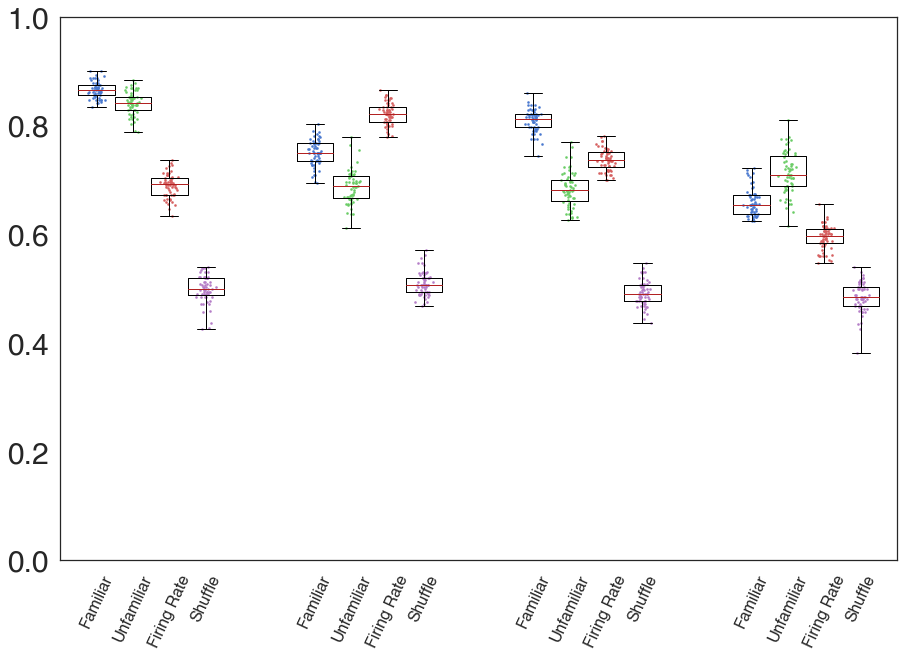

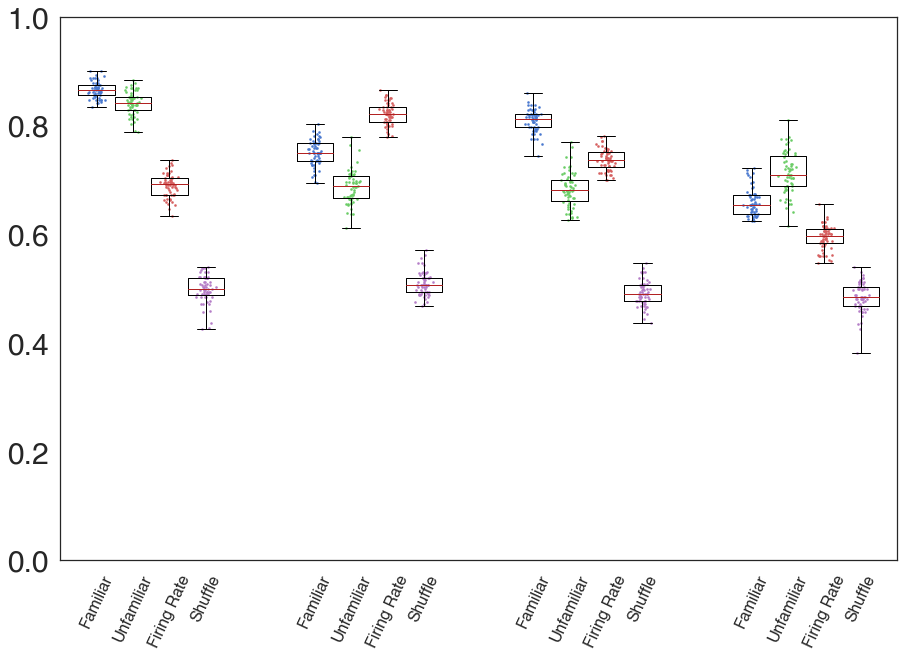

In [14]:
def LR_boxplot(data, order, fig_path=None, colors=None, alphas=None, labels=None, positions=None):
    ''' From Zeke 
        Plot grouped boxplots
        data is in the form of a list of arrays, Ngroups*nboxes/group
    
    '''
    #colors = np.array(['pink', 'lightblue', 'lightgreen', 'pink', 'lightblue', 'lightgreen'])
    #alphas = np.array([0.25, 0.25, 0.25, 0.75, 0.75, 0.75])
    #labels = np.array(['CON/BOS', 'CON/Mot-wise', 'CON/Pc-wise', 'BOS/BOS', 'BOS/Mot-wise', 'BOS/Pc-wise'])
   
    nboxes = len(data)
    if alphas is None:
        alphas = np.array(nboxes*[1.0])
        
    dat_plot = [data[i] for i in order]
    
    box_plot_fig = plt.figure(figsize=(15,10))
    ax = box_plot_fig.add_subplot(111)
    
    medianprops = dict(color='firebrick')
    if positions is not None:
        box_plot = ax.boxplot(dat_plot, 0, '', positions=positions, patch_artist=False, whis='range', widths=1,
                              medianprops=medianprops)
        xlim1 = max(positions)+1
    else:
        box_plot = ax.boxplot(dat_plot, 0, '', patch_artist=False, whis='range', widths=1, medianprops=medianprops)
        xlim1 = max(order)+1

        
    # Do scatter
    scatter_plots = []
    for i in order:
        xs = np.array(len(data[i])*[positions[i]])+0.1*np.random.randn(len(data[i]))
        scatter_plot = ax.scatter(xs, data[i], s=4, alpha=1)
        scatter_plots.append(scatter_plot)
        
    #box_plot = sns.boxplot(data = dat_plot, ax=ax)
    
    if labels is not None:
        plt.xticks(positions[order], labels[order], rotation=65)
    plt.grid(False)
    plt.ylim(0.0, 1)
    plt.xlim(0.0, xlim1)
    ax.tick_params(axis='y', labelsize=30)
    if colors is not None:
        for patch, color, alpha in zip(scatter_plots, colors[order], alphas[order]):
                patch.set_facecolor(color)
                #patch.set_alpha(0.0)
    
    #label_diff(1, 2, '**', dat_plot[0], dat_plot[1], ax)
    #plt.savefig(fig_path)
    return box_plot_fig

labs = np.tile(['Familiar', 'Unfamiliar', 'Firing Rate', 'Shuffle'], 4)
colors = np.tile(["#9b59b6", "#3498db", "#e74c3c", "#2ecc71"], 4)
colors = np.tile(["#4878CF", "#6ACC65", "#D65F5F","#B47CC7"], 4)
#labs = np.tile(['F', 'U', 'F R', 'S'], 4)
positions=np.array([1,2,3,4,7,8,9,10,13, 14, 15, 16,19, 20, 21, 22])

LR_boxplot(y, list(range(16)), labels=labs, positions=positions, colors=colors)

In [35]:
def grouped_boxplot_with_scatter(data, order, ngroups=1, group_spacing=2, fig_path=None, colors=None, alphas=None, labels=None, positions=None):
    ''' From Zeke 
        Plot grouped boxplots
        data is in the form of a list of arrays, Ngroups*nboxes/group
    
    '''
    #colors = np.array(['pink', 'lightblue', 'lightgreen', 'pink', 'lightblue', 'lightgreen'])
    #alphas = np.array([0.25, 0.25, 0.25, 0.75, 0.75, 0.75])
    #labels = np.array(['CON/BOS', 'CON/Mot-wise', 'CON/Pc-wise', 'BOS/BOS', 'BOS/Mot-wise', 'BOS/Pc-wise'])
   
    nboxes = len(data)
    if alphas is None:
        alphas = np.array(nboxes*[1.0])
        
    dat_plot = [data[i] for i in order]
    
    # compute positions
    nboxes_per_group = int(int(len(data)) / int(ngroups))
    positions = np.arange(nboxes_per_group) +1
    for group in range(1, ngroups):
        positions = np.concatenate([positions, np.arange(max(positions)+group_spacing, max(positions)+group_spacing+nboxes_per_group)])
        
    
    box_plot_fig = plt.figure(figsize=(5,4))
    ax = box_plot_fig.add_subplot(111)
    
    medianprops = dict(color='black')
    if positions is not None:
        box_plot = ax.boxplot(dat_plot, 0, '', positions=positions, patch_artist=False, whis='range', widths=1,
                              medianprops=medianprops)
        xlim1 = max(positions)+1
    else:
        box_plot = ax.boxplot(dat_plot, 0, '', patch_artist=False, whis='range', widths=1, medianprops=medianprops)
        xlim1 = max(order)+1

        
    # Do scatter
    scatter_plots = []
    for i in order:
        xs = np.array(len(data[i])*[positions[i]])+0.1*np.random.randn(len(data[i]))
        scatter_plot = ax.scatter(xs, data[i], s=2, alpha=1)
        scatter_plots.append(scatter_plot)
        
    # Compute group label positions
    labelpos =[]
    for group in range(ngroups):
        pos = positions[group*(nboxes_per_group):group*(nboxes_per_group)+nboxes_per_group]
        labelpos.append(np.mean(pos))
    
    plt.xticks(labelpos, labels, rotation=0)
    plt.grid(False)
    plt.ylim(0.0, 1)
    plt.xlim(0.0, xlim1)
    ax.tick_params(axis='both', labelsize=18)
    if colors is not None:
        for patch, color, alpha in zip(scatter_plots, colors[order], alphas[order]):
                patch.set_facecolor(color)
                #patch.set_alpha(0.0)
    
    #label_diff(1, 2, '**', dat_plot[0], dat_plot[1], ax)
    #plt.savefig(fig_path)
    return box_plot_fig

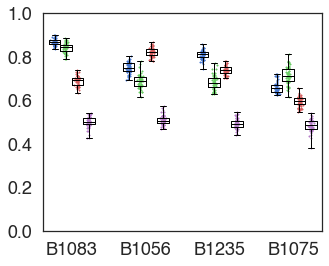

In [36]:
colors = np.tile(["#4878CF", "#6ACC65", "#D65F5F","#B47CC7"], 4)
myfig = grouped_boxplot_with_scatter(y, list(range(16)), ngroups=4, group_spacing=3.5, labels=birds, colors=colors)
figpth = os.path.join(figsavepth, 'LR_Fam_Unf_FR_Shuff.eps')
plt.savefig(figpth)

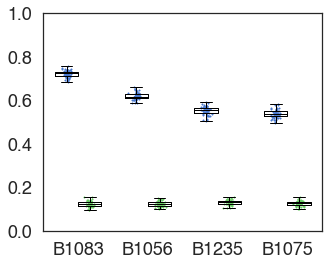

In [37]:
#StimID-8stims
stimIDdat = []
for bird in birds:
    stimIDdat.append(acframe_stimulusID[(acframe_stimulusID['Bird']==bird) & (acframe_stimulusID['Shuffle']=='No')]['Accuracy'].tolist())
    stimIDdat.append(acframe_stimulusID[(acframe_stimulusID['Bird']==bird) & (acframe_stimulusID['Shuffle']=='Yes')]['Accuracy'].tolist())

colors = np.tile(["#4878CF", "#6ACC65"], 4)
myfig2 = grouped_boxplot_with_scatter(stimIDdat, list(range(8)), ngroups=4, group_spacing=2, labels=birds, colors=colors)
figpth = os.path.join(figsavepth, 'LR_Decode_Stimuli_ID.eps')
plt.savefig(figpth)

/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/seaborn/categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


/home/brad/DailyLog/20180130/10.0-5.0-4.0-20-30-10-0.2-60-UnfvFamvFR-stripplot.eps


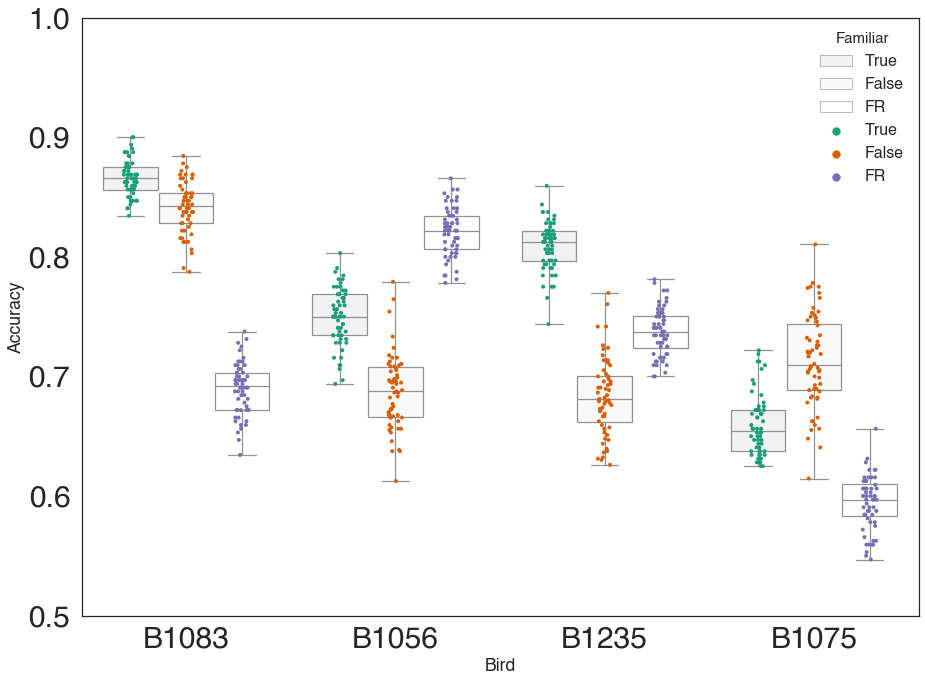

In [18]:
name = 'UnfvFamvFR-stripplot'
sns.set_context('poster')
sns.set_style('white')
sns.set(context='poster', style='white', font='Helvetica')
plt.figure()
plt.figure(figsize=(15, 11))
sns.stripplot(x='Bird', y='Accuracy', hue='Familiar', data=acframe_fam_unf_FR[acframe_fam_unf_FR['Shuffle']=='No'],
              jitter=True, split=True, size=4, palette="Dark2", hue_order=[True, False, 'FR'])
sns.boxplot(x='Bird', y='Accuracy', hue='Familiar', data=acframe_fam_unf_FR[acframe_fam_unf_FR['Shuffle']=='No'], color='white',
            linewidth=1.25, whis=100, hue_order=[True, False, 'FR'])

#plt.boxplot()

plt.ylim([0.5, 1.0])
plt.plot()
ax = plt.gca()
ax.tick_params(labelsize=30)

#plt.yticks([x/10 for x in range(11)])
#plt.ylim([0.3, 1])
#plt.savefig('/home/brad/DailyLog/20170831/{}-{}-{}-{}-{}-{}-{}-{}-{}.eps'.format(winsize, dtovr, thresh, nperms, ncellsperm, Ntimes, p_test, N_tests, name))

figpath = os.path.join(figsavepth, '{}-{}-{}-{}-{}-{}-{}-{}-{}.eps'.format(winsize, dtovr, thresh, nperms, ncellsperm, Ntimes, p_test, N_tests, name))
print(figpath)
plt.savefig(figpath)

In [15]:
acframe_fam_unf_FR

,Accuracy,Bird,Familiar,Shuffle,Type
0,0.868750,B1083,False,No,NaN
1,0.868750,B1083,False,No,NaN
2,0.834375,B1083,False,No,NaN
3,0.843750,B1083,False,No,NaN
4,0.787500,B1083,False,No,NaN
5,0.862500,B1083,False,No,NaN
6,0.837500,B1083,False,No,NaN
7,0.825000,B1083,False,No,NaN
8,0.812500,B1083,False,No,NaN
9,0.837500,B1083,False,No,NaN
